# PCA Analysis for S&P 500 ticker data.
Cannot find reliable futures data.
Run PCA with commodities, try with various expiries


In [213]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 2 Commodities Yfinance

In [214]:
# FIX TICKERS
tickers=["BZ=F", "CL=F"]

# Download the data with yfinance
price_data = yf.download(
    tickers=tickers,
    period="1y",
    interval="1d",
    group_by='column',
    auto_adjust=False,
    prepost=False,
    threads=True,
    proxy=None
)

# Extract Adjusted Close prices
price_data = price_data["Adj Close"]

# Subtract mean of each ticker's data from that ticker's data
price_data_m_mean = price_data.sub(price_data.mean())



[*********************100%%**********************]  2 of 2 completed


# SNP 500 Yfinance

In [215]:
# Retrieve current constituents list from Wikipedia
constituents = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# Handle Failed Downloads and remove corresponding tickers
tickers = list(constituents["Symbol"])
tickers.remove('BRK.B')
tickers.remove('BF.B')

# Download the data with yfinance
price_data = yf.download(
    tickers=tickers,
    period="5y",
    interval="1mo",
    group_by='column',
    auto_adjust=False,
    prepost=False,
    threads=True,
    proxy=None
)

# Extract Adjusted Close prices
price_data = price_data["Adj Close"]

# Fill NaN values with the average of the data point before and after
price_data_m_mean = price_data.sub(price_data.mean())

# Fill NaN values with the average of the data point before and after
price_data_m_mean = price_data_m_mean.fillna(method='ffill').fillna(method='bfill')

[*********************100%%**********************]  501 of 501 completed


#https://www.eia.gov/dnav/ng/ng_pri_fut_s1_d.htm

Contract 1	A futures contract specifying the earliest delivery date. Natural gas contracts expire three business days prior to the first calendar day of the delivery month. Thus, the delivery month for Contract 1 is the calendar month following the trade date.


Contract 2-4	Represent the successive delivery months following Contract 1.
Futures Price	The price quoted for delivering a specified quantity of a commodity at a specified time and place in the future.


In [216]:
import pandas as pd

# Read the Excel file
file_path = "RawData/Natural_Gas_Spot_and_Futures_Prices_(NYMEX).xlsx"
price_data = pd.read_excel(file_path)

# Extract relevant columns
price_data = price_data[['Day', 'Natural Gas Futures Contract 2 $/MMBTU', 'Natural Gas Futures Contract 4 $/MMBTU', 
                         'Natural Gas Futures Contract 3 $/MMBTU', 'Natural Gas Futures Contract 1 $/MMBTU']]

# Rename columns for easier access
price_data.columns = ['Day', 'Contract 2', 'Contract 4', 'Contract 3', 'Contract 1']

# Create a new column containing an array of numbers from 1 to the length of the dataset
price_data['Day'] = range(1, len(price_data) + 1)

# Set 'Day' column as index
price_data.set_index('Day', inplace=True)

# Subtract mean of each column's data from that column's data
price_data_m_mean = price_data.sub(price_data.mean())

# Fill NaN values with the average of the data point before and after
price_data_m_mean = price_data_m_mean.fillna(method='ffill').fillna(method='bfill')

price_data


,Contract 2,Contract 4,Contract 3,Contract 1
Day,,,,
1,2.095,2.580,2.332,1.957
2,2.073,2.567,2.312,1.916
3,1.975,2.466,2.212,1.835
4,2.008,2.507,2.249,1.860
5,2.052,2.535,2.285,1.885
...,...,...,...,...
7560,2.231,2.135,2.160,2.374
7561,2.220,2.142,2.162,2.358
7562,2.256,2.145,2.175,2.411


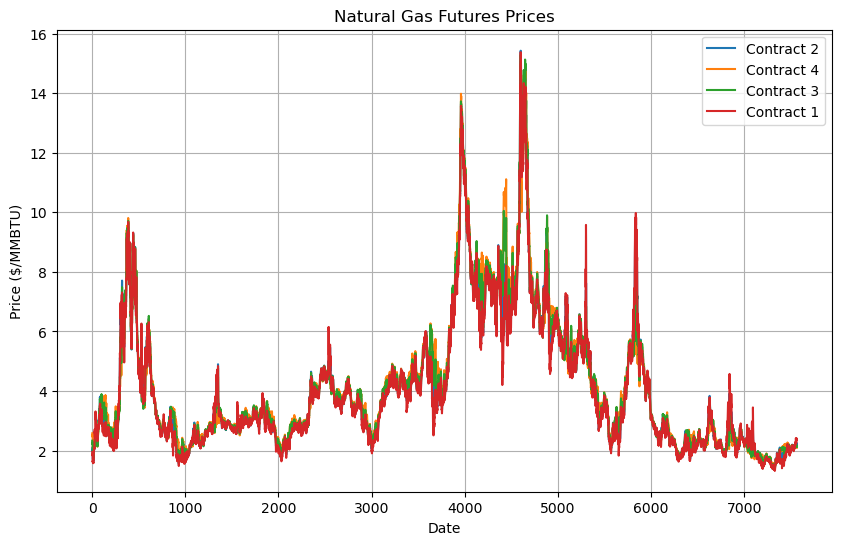

In [217]:
import matplotlib.pyplot as plt

# Plot the price data
plt.figure(figsize=(10, 6))

# Plot each contract's price
for column in price_data.columns:
    plt.plot(price_data.index, price_data[column], label=column)

plt.title('Natural Gas Futures Prices')
plt.xlabel('Date')
plt.ylabel('Price ($/MMBTU)')
plt.legend()
plt.grid(True)
plt.show()


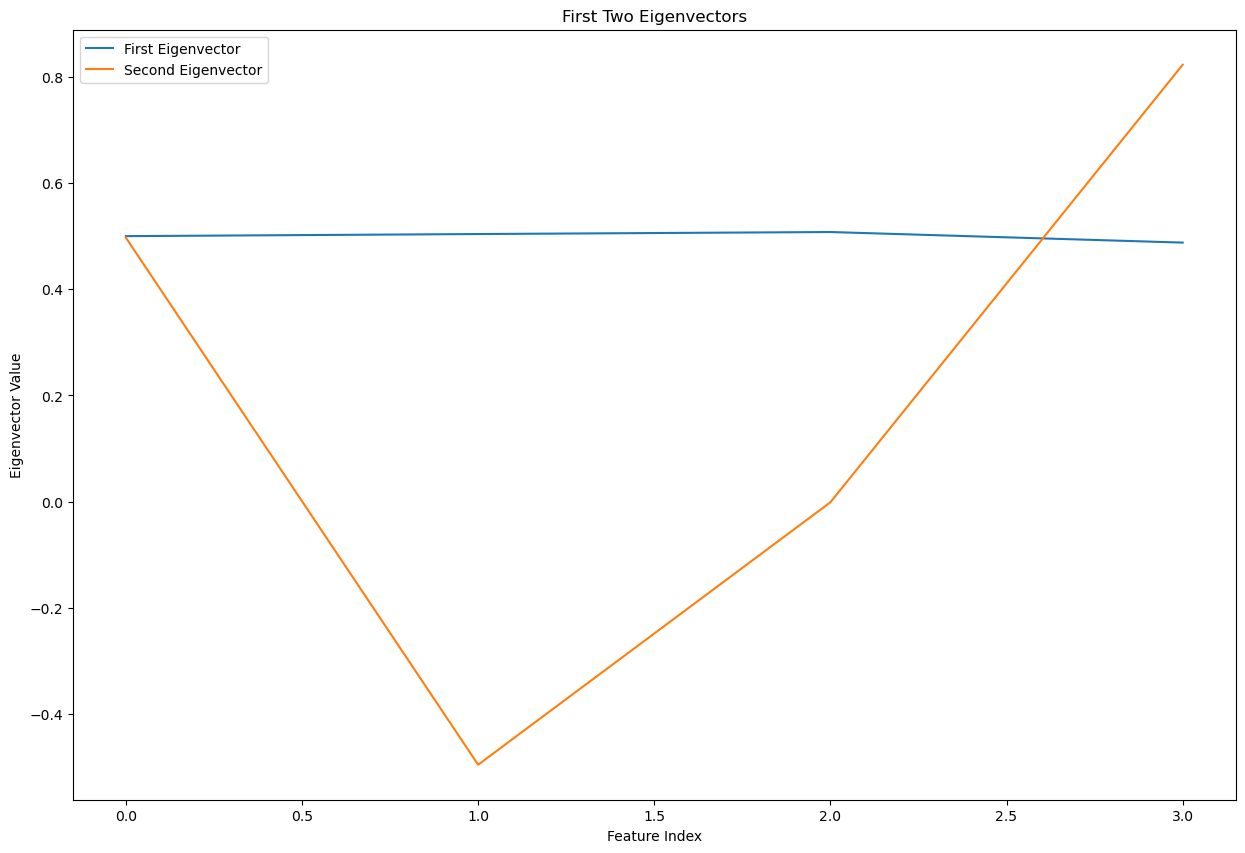

In [218]:
# Apply PCA
pca = PCA(n_components=2)
fitted = pca.fit(price_data_m_mean)

# Plot the first two eigenvectors
fig, ax = plt.subplots(figsize=[15,10])
ax.plot(pca.components_[0], label='First Eigenvector')
ax.plot(pca.components_[1]+0.2, label='Second Eigenvector')
plt.xlabel('Feature Index')
plt.ylabel('Eigenvector Value')
plt.title('First Two Eigenvectors')
plt.legend()
plt.show()


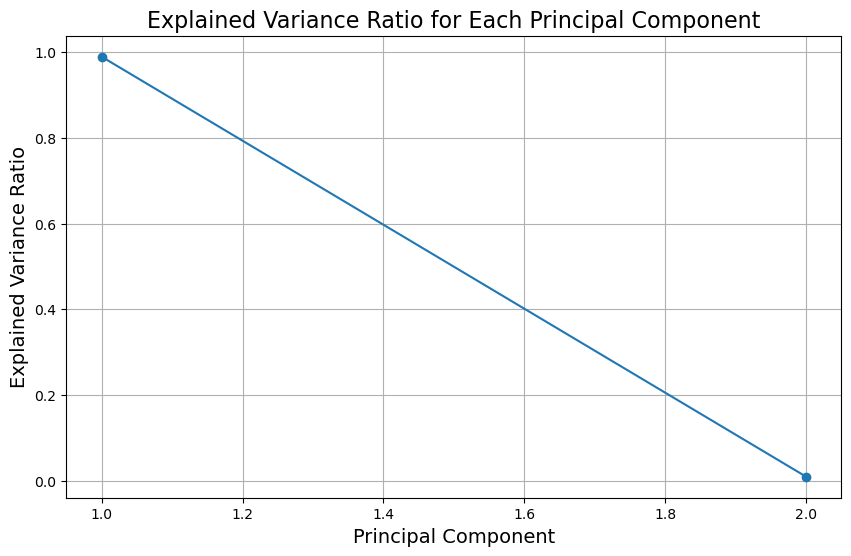

In [219]:
# Plot explained variance ratio
plt.figure(figsize=[10, 6])
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 
         marker='o')
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance Ratio for Each Principal Component', fontsize=16)
plt.grid(True)
plt.show()